In [69]:
import json
import pandas as pd
import numpy as np
from random import randrange
from matplotlib import pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/moonboard_problems_2016.csv', index_col=0, encoding='utf-8', low_memory=False)

In [71]:
df.iloc[:,0:16].info()

<class 'pandas.core.frame.DataFrame'>
Index: 59506 entries, 0 to 59505
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   59506 non-null  object
 1   grade                  59506 non-null  object
 2   userGrade              31427 non-null  object
 3   setby                  59503 non-null  object
 4   method                 59506 non-null  object
 5   userRating             59506 non-null  int64 
 6   repeats                59506 non-null  int64 
 7   isBenchmark            59506 non-null  bool  
 8   isMaster               59506 non-null  bool  
 9   upgraded               59506 non-null  bool  
 10  downgraded             59506 non-null  bool  
 11  holdsets               59506 non-null  object
 12  hasBetaVideo           59506 non-null  bool  
 13  apiId                  59506 non-null  int64 
 14  dateInserted           59506 non-null  object
 15  holdsetup.description  5

In [72]:
df.iloc[:,0:16].isna().sum()

name                         0
grade                        0
userGrade                28079
setby                        3
method                       0
userRating                   0
repeats                      0
isBenchmark                  0
isMaster                     0
upgraded                     0
downgraded                   0
holdsets                     0
hasBetaVideo                 0
apiId                        0
dateInserted                 0
holdsetup.description        0
dtype: int64

<Axes: ylabel='grade'>

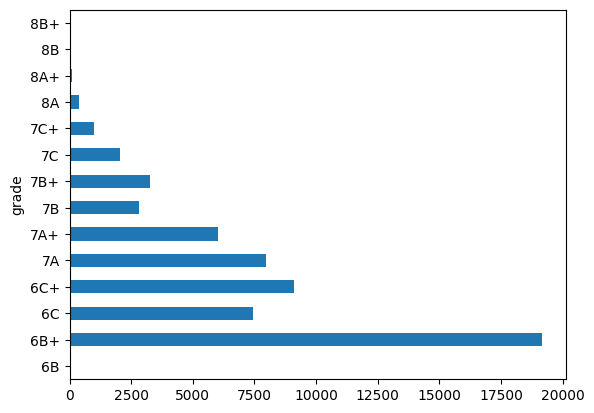

In [73]:
df["grade"].value_counts().sort_index().plot(kind="barh") # viariabile risposta

<Axes: ylabel='userGrade'>

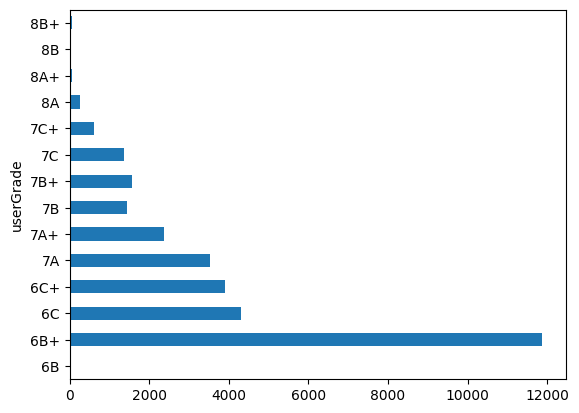

In [74]:
df["userGrade"].value_counts().sort_index().plot(kind="barh") #DA NON USARE

In [75]:
df["method"].value_counts()#.plot(kind="barh")

method
Feet follow hands    59506
Name: count, dtype: int64

<Axes: ylabel='userRating'>

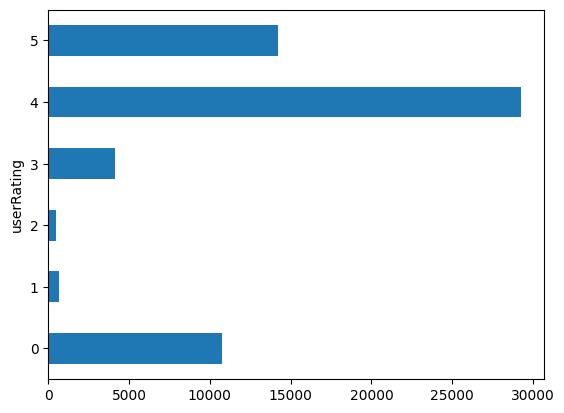

In [76]:
df["userRating"].value_counts().sort_index().plot(kind="barh") #DA NON USARE

In [77]:
(df["isBenchmark"].value_counts() / df.shape[0]).round(4)

isBenchmark
False    0.9918
True     0.0082
Name: count, dtype: float64

In [78]:
(df["isMaster"].value_counts() / df.shape[0]) #da non usare

isMaster
False    1.0
Name: count, dtype: float64

In [79]:
(df["hasBetaVideo"].value_counts() / df.shape[0])

hasBetaVideo
False    0.976641
True     0.023359
Name: count, dtype: float64

In [80]:
df["holdsets"].value_counts() #molti dubbi su questa colonna

holdsets
Original School Holds | Hold Set A | Hold Set B    28758
Hold Set A | Hold Set B                            21484
Original School Holds | Hold Set A                  2580
Hold Set A                                          2040
Original School Holds | Hold Set B                  1945
Hold Set B                                          1533
Original School Holds                               1166
Name: count, dtype: int64

In [81]:
cumulative_frequencies = df["holdsets"].value_counts(normalize=True).cumsum()
# Visualizza tutte le frequenze cumulative
print(cumulative_frequencies.to_string())

holdsets
Original School Holds | Hold Set A | Hold Set B    0.483279
Hold Set A | Hold Set B                            0.844318
Original School Holds | Hold Set A                 0.887675
Hold Set A                                         0.921957
Original School Holds | Hold Set B                 0.954643
Hold Set B                                         0.980405
Original School Holds                              1.000000


<Axes: ylabel='holdsets'>

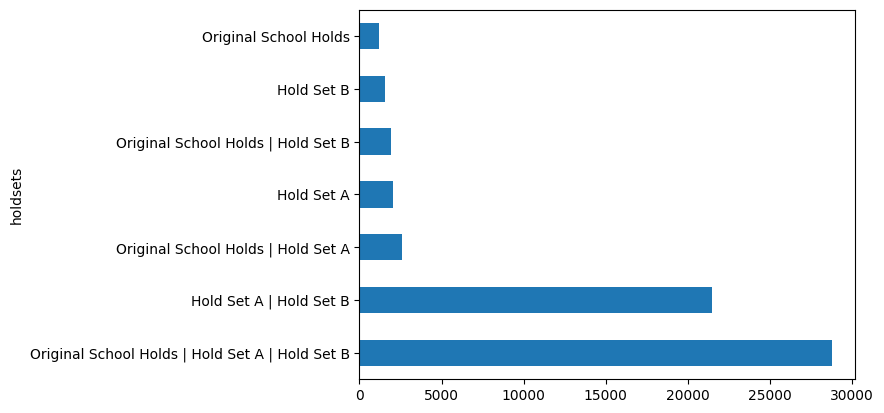

In [82]:
df["holdsets"].value_counts().plot(kind="barh")

In [83]:
df["name"].value_counts() #molti dubbi su questa colonna, DA NON TENERE IN CONSIDERAZIONE

name
STRATO 230    6
P.19          6
P.20          4
Not Mine      3
LOL-HOT       3
             ..
KVT6          1
KVT7          1
KVT8          1
KVT9          1
Problem 23    1
Name: count, Length: 59383, dtype: int64

In [84]:
df["setby"].value_counts() #molti dubbi su questa colonna

setby
Tonip                  759
Riccardo Caprasecca    578
MoonBoardSystem        487
Adan_vive              435
Patton                 404
                      ... 
truelovecrimps           1
Januš Griljc             1
Maciejokk                1
Bismo                    1
Wesley Smith             1
Name: count, Length: 10486, dtype: int64

In [85]:
cumulative_frequencies_2 = df["setby"].value_counts(normalize=True).cumsum()
# Visualizza tutte le frequenze cumulative
print(cumulative_frequencies_2.to_string())

setby
Tonip                                 0.012756
Riccardo Caprasecca                   0.022469
MoonBoardSystem                       0.030654
Adan_vive                             0.037964
Patton                                0.044754
DanielBar                             0.051292
JAVIERMENG                            0.057274
Kilgour22                             0.063156
Rodope                                0.069022
Kyle Knapp                            0.074887
kisareitit                            0.080282
dopedick                              0.085206
Resnick                               0.090046
Gus Carter                            0.094836
Josh Ko                               0.099373
Hakan Ertekin                         0.103810
Strato Sfera                          0.107776
Twan                                  0.111675
cory galloway                         0.115557
Hash Brown                            0.119322
Steel Turkey                          0.122683
Luis Ro

In [86]:
# Supponiamo di voler processare la colonna "setby"

# Numero di modalità da mantenere
top_n = 20

# Trova le modalità più frequenti
top_categories = df["setby"].value_counts().nlargest(top_n).index
top_categories

Index(['Tonip', 'Riccardo Caprasecca', 'MoonBoardSystem', 'Adan_vive',
       'Patton', 'DanielBar', 'JAVIERMENG', 'Kilgour22', 'Rodope',
       'Kyle Knapp', 'kisareitit', 'dopedick', 'Resnick', 'Gus Carter',
       'Josh Ko', 'Hakan Ertekin', 'Strato Sfera', 'Twan', 'cory galloway',
       'Hash Brown'],
      dtype='object', name='setby')

In [87]:
# Sostituisci le modalità meno frequenti con "other"
df["setby"] = df["setby"].apply(lambda x: x if x in top_categories else "other")

# Controlla il risultato
df["setby"].value_counts()

setby
other                  52406
Tonip                    759
Riccardo Caprasecca      578
MoonBoardSystem          487
Adan_vive                435
Patton                   404
DanielBar                389
JAVIERMENG               356
Kilgour22                350
Kyle Knapp               349
Rodope                   349
kisareitit               321
dopedick                 293
Resnick                  288
Gus Carter               285
Josh Ko                  270
Hakan Ertekin            264
Strato Sfera             236
Twan                     232
cory galloway            231
Hash Brown               224
Name: count, dtype: int64

<Axes: ylabel='setby'>

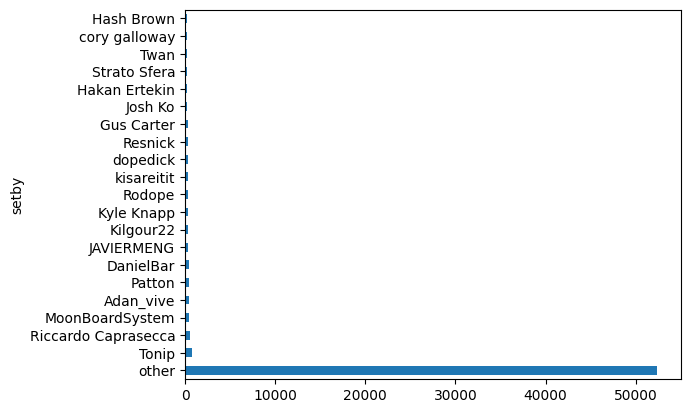

In [88]:
df["setby"].value_counts().plot(kind="barh")

<Axes: ylabel='holdsetup.description'>

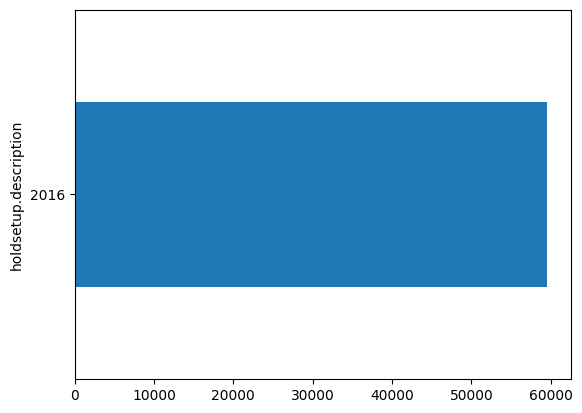

In [89]:
df["holdsetup.description"] = df["holdsetup.description"].replace(2016, "2016")
df["holdsetup.description"].value_counts().sort_index().plot(kind="barh")

In [90]:
df.iloc[:,0:16].info()

<class 'pandas.core.frame.DataFrame'>
Index: 59506 entries, 0 to 59505
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   59506 non-null  object
 1   grade                  59506 non-null  object
 2   userGrade              31427 non-null  object
 3   setby                  59506 non-null  object
 4   method                 59506 non-null  object
 5   userRating             59506 non-null  int64 
 6   repeats                59506 non-null  int64 
 7   isBenchmark            59506 non-null  bool  
 8   isMaster               59506 non-null  bool  
 9   upgraded               59506 non-null  bool  
 10  downgraded             59506 non-null  bool  
 11  holdsets               59506 non-null  object
 12  hasBetaVideo           59506 non-null  bool  
 13  apiId                  59506 non-null  int64 
 14  dateInserted           59506 non-null  object
 15  holdsetup.description  5

DA RIMUOVERE PER LE ANALISI: name, userGrade, upgraded, downgraded, dateinserted, apiId, 

In [91]:
df["upgraded"].value_counts().sort_index() #DA NON USARE

upgraded
False    59444
True        62
Name: count, dtype: int64

In [92]:
df["downgraded"].value_counts().sort_index() #DA NON USARE

downgraded
False    59436
True        70
Name: count, dtype: int64

In [93]:
# Rimuovi le colonne specificate
columns_to_remove = ["isMaster", "upgraded", "downgraded", "dateInserted", "hasBetaVideo", "holdsetup.description"]
df_cleaned = df.drop(columns=columns_to_remove)

In [94]:
df_cleaned = df_cleaned.drop("method", axis=1)  # Rimuovi la colonna "method"

In [95]:
df_cleaned.head()

,name,grade,userGrade,setby,userRating,repeats,isBenchmark,holdsets,apiId,A1,...,K9,K10,K11,K12,K13,K14,K15,K16,K17,K18
0,Far from the Madding Crowd,6B+,6B+,other,4,24993,True,Hold Set B,19215,0,...,0,0,0,0,0,0,0,0,0,0
1,Wuthering Heights,6B+,6B+,other,4,35673,True,Hold Set A,19216,0,...,0,0,1,0,0,0,0,0,0,0
2,Problem 3,6B+,6B+,other,4,757,False,Original School Holds | Hold Set A | Hold Set B,19217,0,...,0,0,0,0,0,0,0,0,0,0
3,HARD TIMES,7A,7A,other,5,8670,True,Hold Set B,19218,0,...,0,0,0,0,0,0,0,0,0,0
4,Problem 5,7A,7A,other,4,255,False,Hold Set B,19219,0,...,0,0,0,0,0,0,0,0,0,0


VISUALITATION

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_observation(df, apiId):
    relevant_columns = sorted(
        [col for col in df.columns if col[0] in "ABCDEFGHIJK" and col[1:].isdigit()],
        key=lambda x: (x[0], int(x[1:]))
    )
    
    if not relevant_columns:
        print("Nessuna colonna rilevante trovata (A1-K18).")
        return
    
    row = df[df['apiId'] == apiId]
    if row.empty:
        print(f"apiId {apiId} non trovato.")
        return

    name = row['name'].values[0]

    try:
        obs = row[relevant_columns].to_numpy().reshape((11, 18))  # (Y=18, X=11)
    except ValueError as e:
        print(f"Errore durante il reshape: {e}")
        print(f"Assicurati che ci siano esattamente 198 valori (18x11) per apiId {apiId}.")
        return

    # Ruota la matrice di 90 gradi a sinistra
    obs_rotated = np.transpose(obs)[::-1]

    obs = obs_rotated

    # Definisci una mappa di colori personalizzata
    cmap = ListedColormap(["white", "black", "green", "red"])
    bounds = [0, 1, 2, 3, 4]
    norm = plt.Normalize(vmin=0, vmax=3)

    plt.figure(figsize=(6, 6))
    plt.imshow(obs, cmap=cmap, norm=norm, aspect="equal")  

    plt.yticks(ticks=np.arange(18), labels=np.arange(18, 0, -1))  # X da 'A' a 'K'
    plt.xticks(ticks=np.arange(11), labels=list("ABCDEFGHIJK"))  # Y da 18 a 1

    plt.title(f"Problem: {name}")

    plt.show()

    filtered_row = df_cleaned[df_cleaned['apiId'] == apiId]

    if not filtered_row.empty:
        print("Grade:", filtered_row['grade'].values[0])
        print("User Grade:", filtered_row['userGrade'].values[0])
        print("Repeats:", filtered_row['repeats'].values[0])
        print("SetBy:", filtered_row['setby'].values[0])
        print("Benchmark:", filtered_row['isBenchmark'].values[0])
    else:
        print("Nessuna osservazione trovata")

In [102]:
import random

def random_apiId_generator(df):
    api_ids = df['apiId'].unique()
    
    while True:
        yield random.choice(api_ids)

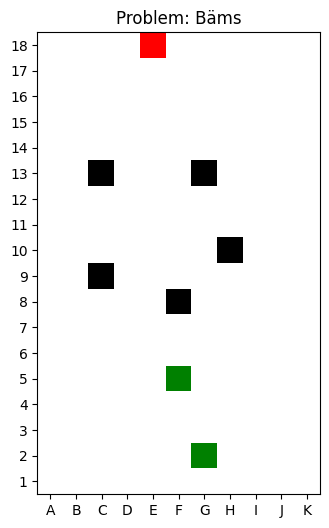

Grade: 6B+
User Grade: 6B+
Repeats: 3
SetBy: other
Benchmark: False


In [104]:
apiId_gen = random_apiId_generator(df_cleaned)
x = next(apiId_gen)
plot_observation(df_cleaned, apiId=x)

In [105]:
# Salva il nuovo dataset in un file CSV
output_path = 'C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/moonboard_2016_cleaned.csv'
df_cleaned.to_csv(output_path, index=False, encoding='utf-8')

print(f"Dataset pulito salvato in: {output_path}")

Dataset pulito salvato in: C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/moonboard_2016_cleaned.csv
